In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing 

In [84]:
fraud = pd.read_csv("Fraud_check.csv")
fraud

,Undergrad,MaritalStatus,TaxableIncome,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [85]:
label_encoder = preprocessing.LabelEncoder()
fraud['Undergrad']= label_encoder.fit_transform(fraud['Undergrad']) 

In [86]:
label_encoder = preprocessing.LabelEncoder()
fraud['Urban']= label_encoder.fit_transform(fraud['Urban']) 

In [87]:
label_encoder = preprocessing.LabelEncoder()
fraud['MaritalStatus']= label_encoder.fit_transform(fraud['MaritalStatus'])

In [88]:
daf = pd.DataFrame(fraud.TaxableIncome)
daf.loc[fraud['TaxableIncome'] <= 30000, 'Risky or not'] = 'NOT RISKY' 
daf.loc[fraud['TaxableIncome'] > 30000, 'Risky or not'] = 'RISKY' 
z = daf
z 

,TaxableIncome,Risky or not
0,68833,RISKY
1,33700,RISKY
2,36925,RISKY
3,50190,RISKY
4,81002,RISKY
...,...,...
595,76340,RISKY
596,69967,RISKY
597,47334,RISKY
598,98592,RISKY


In [95]:
fraud.insert (6, "Risk_Status", z['Risky or not'])

In [96]:
fraud 

,Undergrad,MaritalStatus,TaxableIncome,City.Population,Work.Experience,Urban,Risk_Status
0,0,2,68833,50047,10,1,RISKY
1,1,0,33700,134075,18,1,RISKY
2,0,1,36925,160205,30,1,RISKY
3,1,2,50190,193264,15,1,RISKY
4,0,1,81002,27533,28,0,RISKY
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,RISKY
596,1,0,69967,55369,2,1,RISKY
597,0,0,47334,154058,0,1,RISKY
598,1,1,98592,180083,17,0,RISKY


In [97]:
x=fraud.iloc[:,[0,1,3,4,5]] 
y=fraud['Risk_Status']

In [98]:
x 

,Undergrad,MaritalStatus,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [99]:
y 

0      RISKY
1      RISKY
2      RISKY
3      RISKY
4      RISKY
       ...  
595    RISKY
596    RISKY
597    RISKY
598    RISKY
599    RISKY
Name: Risk_Status, Length: 600, dtype: object

In [100]:
fraud['Risk_Status'].unique()

array(['RISKY', 'NOT RISKY'], dtype=object)

In [101]:
fraud.Risk_Status.value_counts()

RISKY        476
NOT RISKY    124
Name: Risk_Status, dtype: int64

In [102]:
colnames = list(fraud.columns)
colnames

['Undergrad',
 'MaritalStatus',
 'TaxableIncome',
 'City.Population',
 'Work.Experience',
 'Urban',
 'Risk_Status']

In [103]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40) 

## Building Decision Tree using Entropy

In [104]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=3)

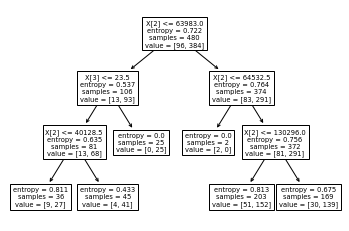

In [106]:
tree.plot_tree(model);

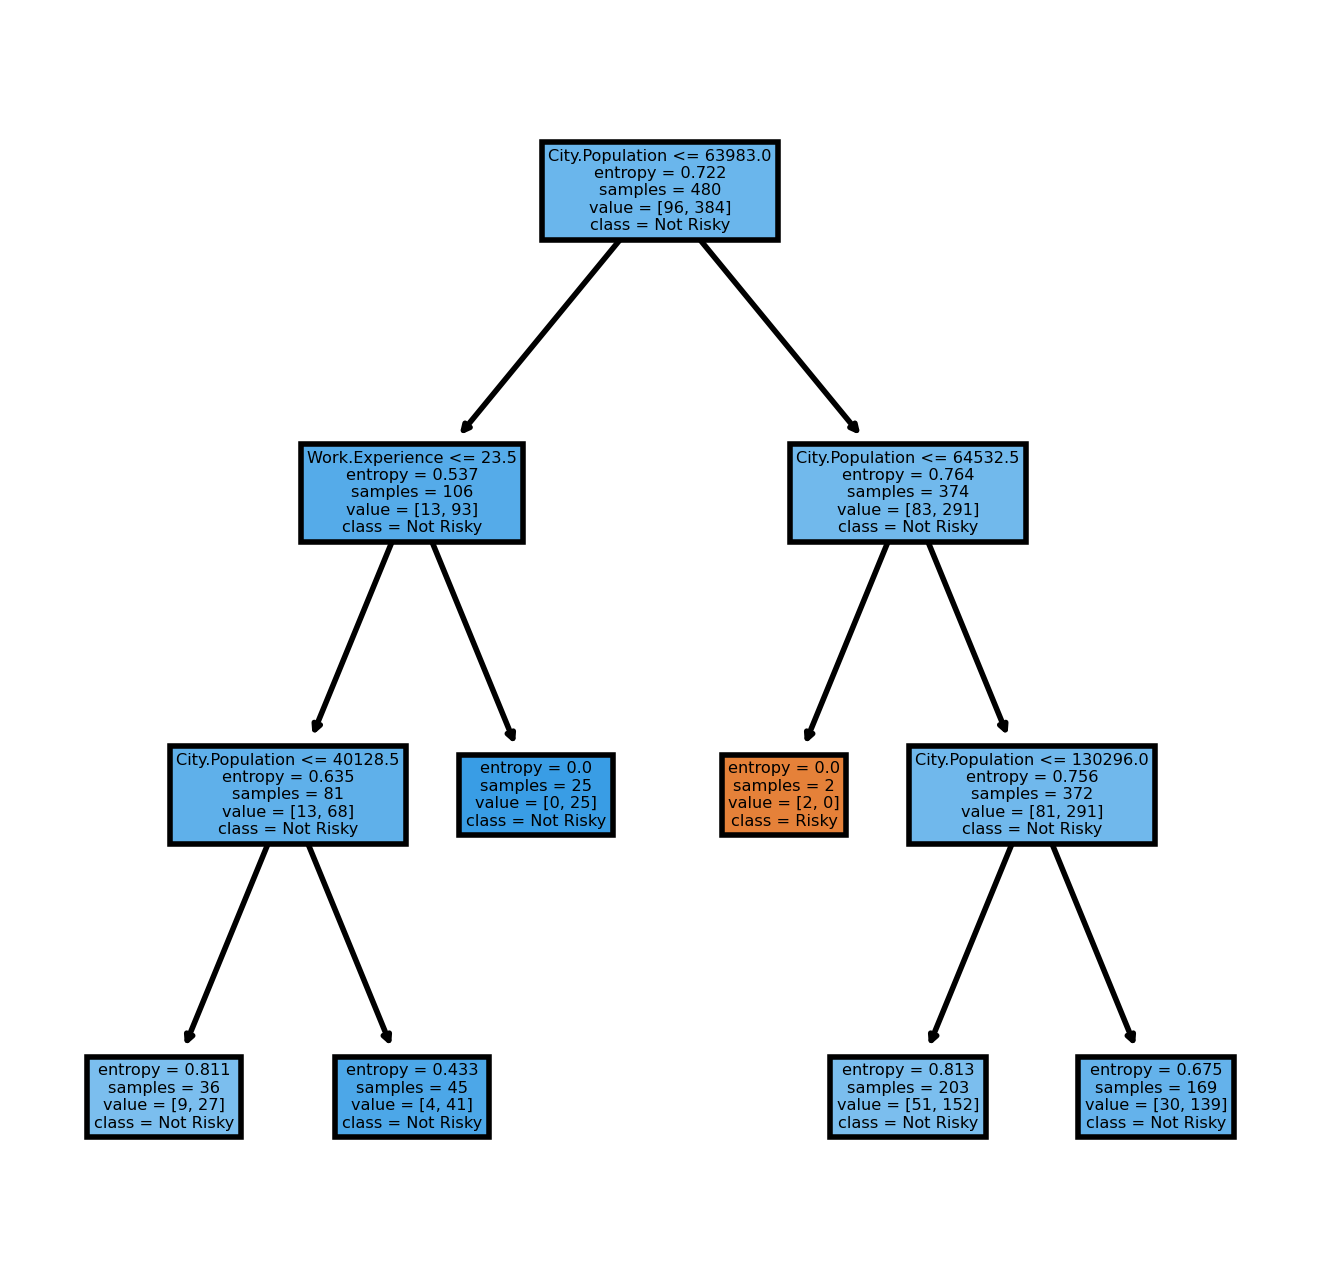

In [107]:
fn=['Undergrad','MaritalStatus','City.Population','Work.Experience','Urban']
cn=['Risky','Not Risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=400) #dpi is dots per image
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

In [110]:
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category  

RISKY    120
dtype: int64

In [111]:
pd.crosstab(y_test,preds)

col_0,RISKY
Risk_Status,
NOT RISKY,28
RISKY,92


In [112]:
np.mean(preds==y_test)

0.7666666666666667

In [113]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3) 

In [114]:
model_gini.fit(x_train, y_train) 

DecisionTreeClassifier(max_depth=3)

In [115]:
pred=model.predict(x_test)
np.mean(preds==y_test) 

0.7666666666666667

In [116]:
from sklearn.tree import DecisionTreeRegressor 

In [185]:
array = fraud.values
X = array[:,0:5]
y = array[:,2] 

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=15) 

In [202]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train) 

DecisionTreeRegressor()

In [203]:
model.score(X_test,y_test) 

0.999870017601315